In [1]:
import matplotlib.pyplot as plt


plt.style.use("seaborn-v0_8")

%config InlineBackend.figure_format = "retina"

In [2]:
import graphviz as gr


def draw_graph(edge_list, node_props=None, edge_props=None, graph_direction="UD"):
    """Utility to draw a causal (directed) graph"""
    g = gr.Digraph(
        graph_attr={
            "rankdir": graph_direction,
            "ratio": "0.3",
            "overlap": "vpsc",
            "splines": "true",
            "mode": "sgd",
            "lheight": "4",
        },
        engine="dot",
    )

    edge_props = {} if edge_props is None else edge_props
    for e in edge_list:
        props = edge_props[e] if e in edge_props else {}
        g.edge(e[0], e[1], **props)

    if node_props is not None:
        for name, props in node_props.items():
            g.node(name=name, **props)
    return g

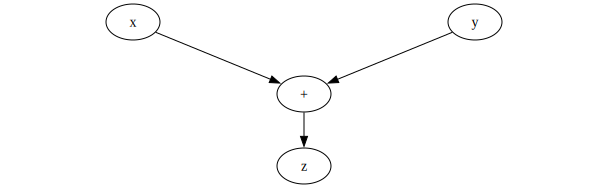

In [5]:
draw_graph([("x", "+"), ("y", "+"), ("+", "z")])

In [7]:
import pytensor
import pytensor.tensor as pt


# Pytensor
x = pt.tensor(shape=(3,), dtype="float64")  # Symbolic vector
y = pt.log(1 + x)  # Symbolic computation
y, type(y)

(Log.0, pytensor.tensor.variable.TensorVariable)

In [8]:
y.dprint()

Log [id A]
 └─ Add [id B]
    ├─ ExpandDims{axis=0} [id C]
    │  └─ 1 [id D]
    └─ <Vector(float64, shape=(3,))> [id E]


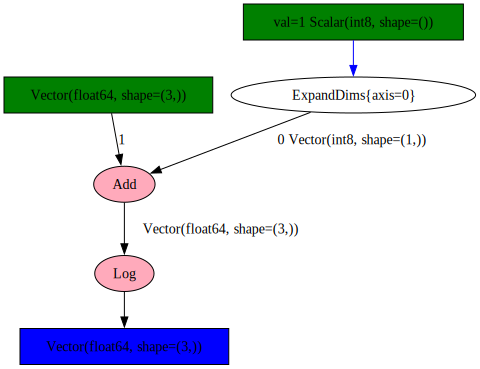

In [11]:
from IPython.display import SVG

from pytensor.printing import pydotprint


SVG(pydotprint(y, return_image=True, format="svg"))